In [2]:
%pylab inline
from siph import *

Populating the interactive namespace from numpy and matplotlib


/Users/hantke/Library/Python/2.7/lib/python/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['histogram']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
sigma = 0.1
nbins = 101
nphotons = 1000000
L = 5

x_data = []
y_data = []

for noise_sigma in [None, 0.1]:
    I, H = hist_I(sigma=sigma, L=L, nphotons=nphotons, noise_sigma=noise_sigma, nbins=nbins)
    I_test, H_test = generate_test_hist_I(sigma=sigma, L=L, nphotons=nphotons, noise_sigma=noise_sigma, nbins=nbins)
    x_data.append([I_test, I])
    y_data.append([H_test, H])
    
    print "H", H[abs(I-0).argmin()]
    print "I", I[abs(I-0).argmin()]

    print "H_test", H_test[abs(I_test-0).argmin()]
    print "I_test", I_test[abs(I_test-0).argmin()]
    
    print H[abs(I-0).argmin()]-H_test[abs(I_test-0).argmin()]


H 914119.402926
I 0.0
H_test 913947
I_test 0.0
172.40292566
H 74743.7717192
I 0.0
H_test 74380
I_test 0.0
363.771719215


(0.0, 8090.0)

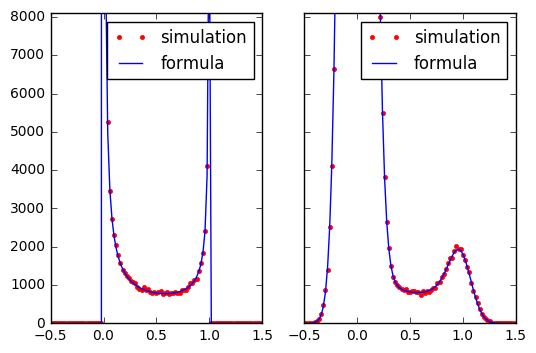

In [7]:
fig, axs = subplots(1, 2, sharex=True, sharey=True)

for (x_test,x),(y_test,y),ax in zip(x_data, y_data, axs):
    ax.plot(x_test, y_test, ".", lw=2, c='red')
    ax.plot(x, y)    
    
    ax.legend(["simulation", "formula"])
    
ax.set_ylim(0., y_test[len(y_test)/2]*10.)